#**Ajuste Nolineal utilizando el modulo optimize de la libreria scipy**
El código que se muestra a continuacíon permite realizar ajustes no lineal utilizando la libreria de scipy, especificamente el modulo optimize, donde se hace uso del algoritmo de Levenberg–Marquardt

In [1]:
#Esto pemite montar la carpeta de drive en el espacio de google colab
#Se debe dar permisos para poder montar los archivos del drive
from google.colab import drive
import sys
drive.mount('/content/gdrive')
#cd path/to/your/folder
#!cd /content/gdrive/MyDrive/"Colab Notebooks"
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks/')

!ls  #listamos el directorio en el que estamos ubicados


Mounted at /content/gdrive
gdrive	sample_data


In [2]:
#Especificamos la ruta de la carpeta en la cual estaran los datos
from pathlib import Path
# the path of the directory which saves your .py file
src_dir1 = Path('/content/gdrive/MyDrive/Colab Notebooks/')

# add the path to system path
import sys
try:
  sys.path.index(str(src_dir1))
except ValueError:
  sys.path.insert(0,str(src_dir1))

# print system path
sys.path

['/content/gdrive/MyDrive/Colab Notebooks',
 '/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython']

In [3]:
#Ajuste No lineal para una funcion senoidal
#Programa para realizar un ajsute lineal en python
import numpy as np
import matplotlib.pyplot as plt
import fit_leastsq as f_l #libreria para ajusta los datos

# La funcion que se desee ajuistar debe ser definida en la definicion de funF(valor x, parametros)

In [4]:
#Funcion para convertir string a float, devueve un lista np
def str2float(lst):
	return np.array([float(i) for i in lst])

#Funcion para contar el numero de datos por columna
#Si encuentra espacio vacio, el programa lo ignora
def size_Num(array):
	n2 = array.size
	n3 = 0

	for i in range(0,n2):
	   if array[i] != '':
	      n3 += 1
	return n3

#Definicion de funcion
"""
#Ajuste de una funcion  tipo seno o coseno
def funF(x, p0,p1,p2, p3):
	return p0*np.sin(2*np.pi*p1*x+p2)+p3
def funFF(x, p):
	return funF(x,*p)
"""

#Definicion de la funcion para ajustar
def funF(x, p2,p1,p0):
	return p2*x**2 + p1*x + p0
def funFF(x, p):
	return funF(x,*p)

In [5]:
#Se pide el nombre de archivo
print("Nombre de archivo de los datos con extension: ", end="")
#name = str(input())
name = 'CaidaLibre4.csv'
print("Delimitador de campo: ", end="")
#delimiter = str(input())
delimiter = ','
print("# de linea de inicio de datos: ", end="")
#sLine = int(input())
sLine = 1

fileData = np.loadtxt(sys.path[0]+'/'+name,dtype=float, delimiter=delimiter, skiprows = sLine)

Nombre de archivo de los datos con extension: Delimitador de campo: # de linea de inicio de datos: 

In [6]:
#Linea para desplazar el eje o de los datos
#x_exp = (x_exp - x_exp[0])
n = size_Num(fileData[:,0])
x_exp = str2float(fileData[:n,0])
y_exp = str2float(fileData[:n,1])

x_teo = np.linspace(x_exp[0],x_exp[n-1],n*5)

# El numero de parametros que se ingrasan depende del tipo de funcion que se desee ajustar

In [7]:
1#Si se utiliza otra funcion se debe modificar la
#lista de parametros
print("Parametros de ajuste iniciales: ")
print("Coeficiente P2: ", end="")
A = float(input())
print("Coeficiente P1: ", end="")
B = float(input())
print("Coeficiente P0: ", end="")
C = float(input())

#Lista inicial de los parametros del ajuste
p_start = [A,B,C]

Parametros de ajuste iniciales: 
Coeficiente P2: 1
Coeficiente P1: 1
Coeficiente P0: 1


# Se realiza el ajuste respectivo de los datos

In [8]:
pfit_ls, perr_ls = f_l.fit_leastsq(p_start, x_exp, y_exp, funFF)
chi_sq = sum((funFF(x_exp, pfit_ls) - y_exp)**2/funFF(x_exp, pfit_ls))
print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit_ls)
print("perr = ", perr_ls)
print("Chi_2 = ", chi_sq)


# Fit parameters and parameter errors from lestsq method :
pfit =  [ 4.69404479e+03  2.36971763e+02 -1.76632146e+00]
perr =  [21.71087603  4.45134685  0.2080945 ]
Chi_2 =  0.0063455526460125195


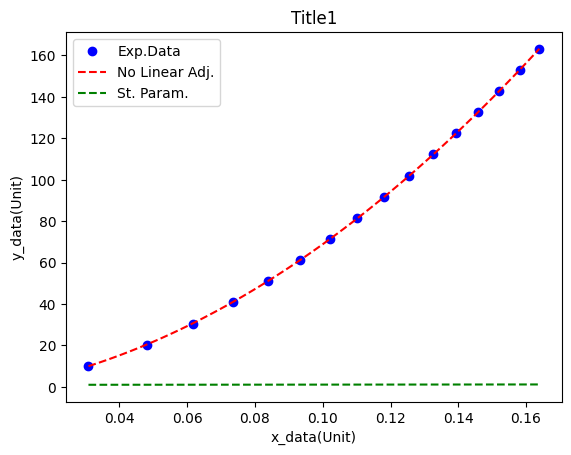

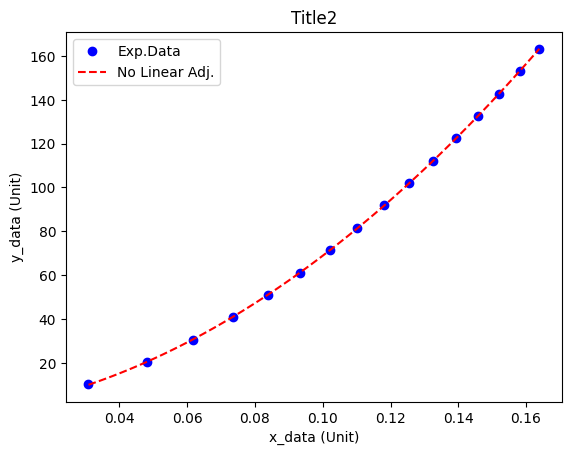

In [9]:
#Grafica de la funcion con los parametros de ajuste iniciales y
#con la funcion con los parametros ajustados
plt.figure()
plt.plot(x_exp,y_exp, "bo", label = "Exp.Data")
plt.plot(x_teo,funFF(x_teo, pfit_ls), "r--", label = "No Linear Adj.")
plt.plot(x_teo,funFF(x_teo, p_start), "g--", label = "St. Param.")
plt.xlabel("x_data(Unit)")
plt.ylabel("y_data(Unit)")
plt.title("Title1")
plt.legend()

#Grafica de la funcion con los parametros de ajustados
plt.figure()
plt.plot(x_exp,y_exp, "bo", label = "Exp.Data")
plt.plot(x_teo,funFF(x_teo, pfit_ls), "r--", label = "No Linear Adj.")
plt.xlabel("x_data (Unit)")
plt.ylabel("y_data (Unit)")
plt.title("Title2")
plt.legend()
plt.savefig(sys.path[0]+'/'+"noLinearAdjust.png")
plt.show()
##Ajuste lineal##
